# Qu'est-ce qui rend les gens a l'aise en informatique ?

Les vieux sont-ils plus nuls que les jeunes ? Ou bien est-ce un probleme d'education ?

Parmi tous les repondants quels sont ceux qui declarent s'en sortir le mieux ?

In [1]:
import mbr_typeform as mbrtf
import mbr_plots as mbrpl

#-------------------------------------------------------------------------
# Initialisation de la structure / changer 'formid' pour votre formulaire
# Initializing structure / change 'formid' to set your form id
#-------------------------------------------------------------------------

# Initialisation de tfs via l'ID du questionnaire
tfs = mbrtf.tf_struct(formid='YvBfAdHB')

# Recupere toute la structure du questionnaire que retoune l'API
struct_d = tfs.get_form_structure()
# Recupere le titre du questionnaire
form_title = tfs.get_title()
# Recupere seulement les champs associes aux questions
form_questions = tfs.get_fields()
# Recupere le fichier de reponse dans le dossier 'responses'. Le fichier doit etre nomme "res_{id questionnaire}.csv"
form_responses = tfs.get_form_responses()
# Retourne le nombre de reponses totales
nb_responses = tfs.get_nb_responses()
# Retourne et ecrit les groupes definis dans le questionnaire
form_groups = tfs.get_groups()




#-------------------------------------------------------------------------
# Definition de quelques preferences graphiques
#-------------------------------------------------------------------------
# J'ai fait une fonction qui prend ces valeurs par defaut, pour tracer mes differents charts, cela evitera de faire trop de code dans les NoteBook
myfig = mbrpl.plots_mbr_tf()

Group 1 : Apprenons à  se connaître
Group 2 : Votre rapport au numérique...
Group 3 : Enseignement et éducation...
Group 4 : L'offre culturelle numérique
Group 5 : Les sujets qui vous interessent
Group 6 : Pour conclure


## Ceux qui voient l'IT comme une benediction, combien se donnent-il ?

In [2]:
g_idx = 1
q_id = 'rT2VhptKefBR'

# Get labels and results
q_bene, l_bene_lbl, l_bene_dtfs = tfs.get_results(gidx=g_idx,qid=q_id)

# Rappel des options :
print("Rappel des options possibles :\n ",l_bene_lbl)

Rappel des options possibles :
  ['Bénédiction', 'Malédiction', 'Drôle de question']


In [3]:
# nombre reponse totale du subset
nbresp_subset = l_bene_dtfs[0].shape[0]

g_idx2 = 1
q_id2 = 'IihvSDBsSpUH'
# Get labels and results
q_confiance, confiance_lbls, confiance_dtfs = tfs.get_sub_question_data(gidx=g_idx2, qid=q_id2, inputdtf = l_bene_dtfs[0]) 

# Rappel des options :
print("Rappel des options possibles :\n ",confiance_lbls)

Rappel des options possibles :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


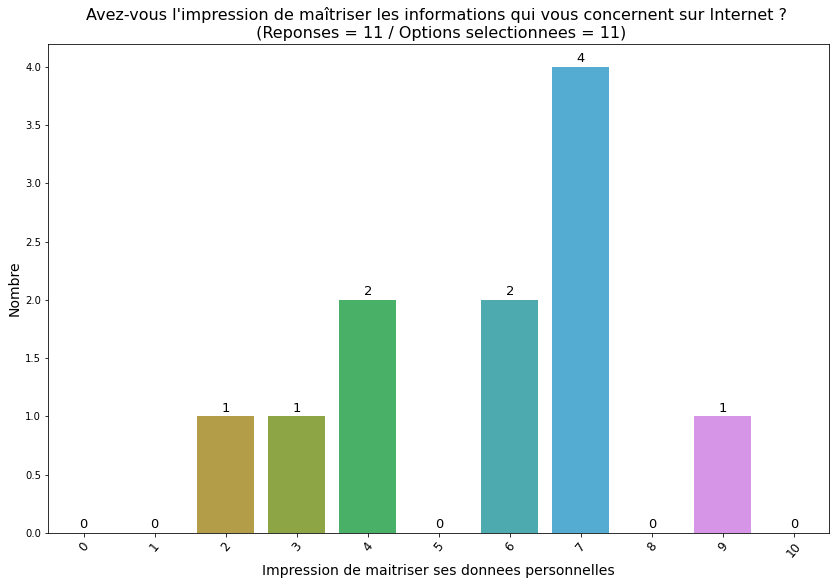

In [4]:
myfig.plot_mbr_barchart(qtitle = q_confiance, list_labels = confiance_lbls, list_dfs = confiance_dtfs, bar_xlabel = "Impression de maitriser ses donnees personnelles", bar_ylabel = 'Nombre', nb_responses = nbresp_subset)

In [5]:
moyenne_maitrise = mbrpl.moyenne_generale_note(liste_notes = confiance_lbls, liste_dtfs = confiance_dtfs, nbresp = nbresp_subset)

print('Moyenne generale : '+str(moyenne_maitrise))

Moyenne generale : 5.636363636363637


# Specialite = IT - Croisement de donnees

## Aisance avec les outils numeriques

In [6]:
gidx = 0
qid = 'OnnjlaZauNJ0'

# Get labels and results
qScpecialite, spec_lbls, spec_dtfs = tfs.get_results(gidx=gidx,qid=qid)

# Rappel des options :
print("Rappel des specialites possibles :\n ",spec_lbls)

Rappel des specialites possibles :
  ["Services d'informations", 'Budget / Finance / Compta', 'Juridique / Droits', 'Bâtiment / Sécurité physique', 'Développement commercial', 'Communication / Partenariats / Evénementiel', 'Ressources humaines / Santé / Social', 'Restauration / Tourisme', 'Other']


In [7]:
# nombre reponse totale du subset
nbresp_subset = spec_dtfs[0].shape[0]

g_idx2 = 1
q_id2 = 'bK9T5Pen4AB0'
# Get labels and results
q_aisance, aisance_lbls, aisance_dtfs = tfs.get_sub_question_data(gidx=g_idx2, qid=q_id2, inputdtf = spec_dtfs[0]) 

# Rappel des options :
print("Rappel des options possibles :\n ",aisance_lbls)

Rappel des options possibles :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


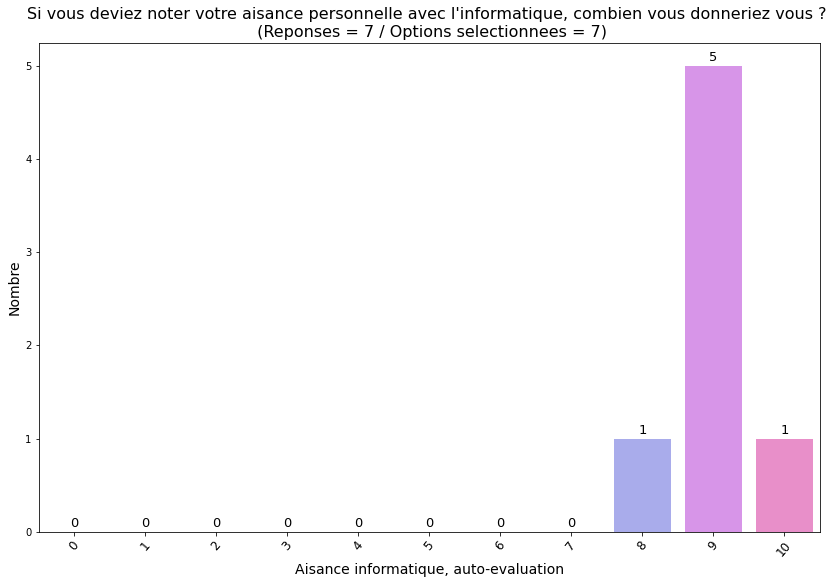

In [8]:
myfig.plot_mbr_barchart(qtitle = q_aisance, list_labels = aisance_lbls, list_dfs = aisance_dtfs, bar_xlabel = "Aisance informatique, auto-evaluation", bar_ylabel = 'Nombre', nb_responses = nbresp_subset)

# TODO : Pouvoir enlever une categorie

# Voir si l'age influe sur l'aisance

In [12]:
# g_idx = 1
# q_id = 'bK9T5Pen4AB0'

g_idx = 0
q_id = 'BZsILkKYGzKQ'

q_age, age_lbls, age_dtfs = tfs.get_results(gidx=g_idx,qid=q_id)
# Rappel des options :
print("Rappel des options possibles :\n ",age_lbls)

Rappel des options possibles :
  ['Moins de 18 ans', 'Entre 18 et 25 ans', 'Entre 26 et 35 ans', 'Entre 36 et 50 ans', 'Entre 51 et 75 ans', '76 ans et plus']


In [13]:
# g_idx2 = 0
# q_id2 = 'BZsILkKYGzKQ'

g_idx2 = 1
q_id2 = 'bK9T5Pen4AB0'

# Trouver quel age a vote pour quelle aisance
q_aisance, aisance_lbls, aisance_byage_dtfs = tfs.get_sub_reponses(subq_gidx=g_idx2, subq_qid=q_id2, inputdtfs = age_dtfs) 
# Rappel des options :
print("Rappel des options possibles :\n ",aisance_lbls)

Input dtf in sub_opinion_dtfs is None
Input dtf in sub_opinion_dtfs is None
Rappel des options possibles :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


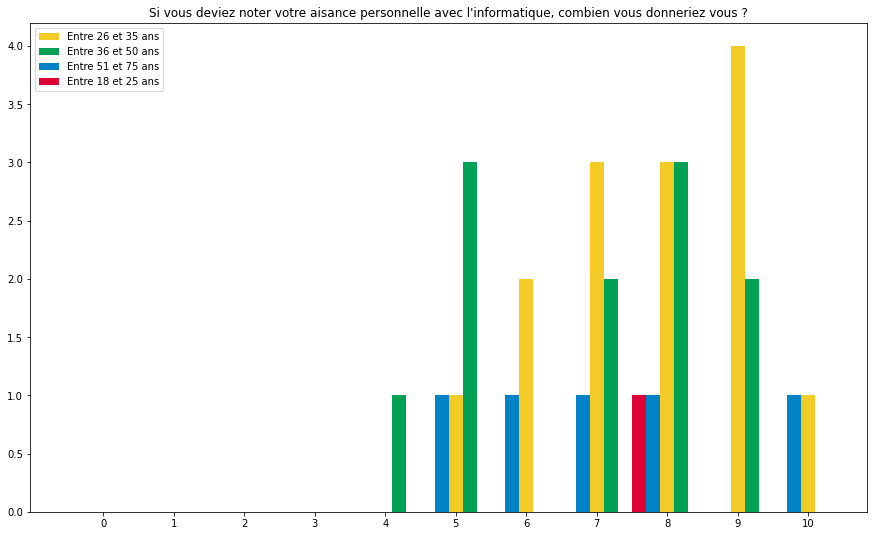

In [14]:
myfig.plot_mbr_multiple_bars(qtitle = q_aisance, xlist_labels = aisance_lbls, legends = age_lbls, list_sub_dtfs = aisance_byage_dtfs, bar_indxs = [-2,0,1,-1])

# Influence de l'apprentissage de l'informatique sur l'autoevaluation

In [15]:
g_idx = 2
q_id = 'NXnMNhHW9dGK'

# Get labels and results
q_apprentissage, l_apprentissage_lbl, l_apprentissage_dtfs = tfs.get_results(gidx=g_idx,qid=q_id)

# Rappel des options :
print("Rappel des options possibles :\n ",l_apprentissage_lbl)

Rappel des options possibles :
  ['oui', 'non']


In [16]:
g_idx2 = 1
q_id2 = 'bK9T5Pen4AB0'

# Trouver quel age a vote pour quelle aisance
q_aisance, aisance_lbls, aisance_byapprentissage_dtfs = tfs.get_sub_reponses(subq_gidx=g_idx2, subq_qid=q_id2, inputdtfs = l_apprentissage_dtfs) 
# Rappel des options :
print("Rappel des options possibles :\n ",aisance_lbls)

Rappel des options possibles :
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


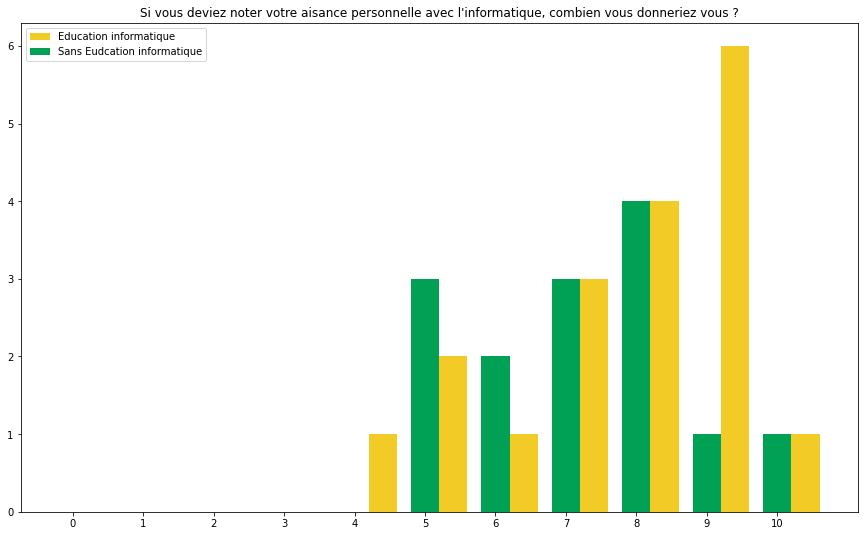

In [17]:
myfig.plot_mbr_multiple_bars(qtitle = q_aisance, xlist_labels = aisance_lbls, legends = ["Education informatique", "Sans Eudcation informatique"], list_sub_dtfs = aisance_byapprentissage_dtfs, bar_indxs = [1, 0])

# Influence de la specialite sur l'aisance